In [10]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor

# Stringency Index Training predictio nwith RF

### 1.Data processing

In [11]:
df = pd.read_csv('stringency_index.csv')

In [12]:
df = df.drop(columns = 'Unnamed: 0')

In [13]:
df = df.dropna().reset_index().drop(columns='index')

Defining features and target

In [14]:
features = ['total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'icu_patients',
            'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'reproduction_rate',
            'total_vaccinations_per_hundred', 'total_vaccinations']
target = ['stringency_index']

Splitting training and test sets

In [15]:
X = df[features].values
y = df[target].values
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=1,
    shuffle=True
)

### 2.TPOT for model selection
Not running the script as it takes long time to select model.

In [23]:
# from tpot import TPOTRegressor

In [24]:
# GENERATIONS = 5
# POP_SIZE = 50
# CV = 5
# tpot = TPOTRegressor(
#     generations=GENERATIONS,
#     population_size=POP_SIZE,
#     random_state=20,
#     n_jobs=-1,
#     cv=CV,
#     verbosity=2,
# )

# tpot.fit(X_train, Y_train)

Generation 1 - Current best internal CV score: -4.610328605969496

Generation 2 - Current best internal CV score: -4.48553841737179

Generation 3 - Current best internal CV score: -4.48553841737179

Generation 4 - Current best internal CV score: -3.994255696079829

Generation 5 - Current best internal CV score: -3.811087182879129

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.6000000000000001, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
TPOTRegressor(generations=5, n_jobs=-1, population_size=50, random_state=20,
              verbosity=2)

In [25]:
#preds = tpot.predict(X_validation)

In [26]:
#print(r2_score(Y_validation, preds))

Results in  $R^2$ of 0.9885767040926469

In [27]:
#tpot.export('RandomForestRegressor.py')

Implementing TPOT suggestion

In [16]:
rf = RandomForestRegressor(bootstrap=False, max_features=0.6000000000000001, min_samples_leaf=2, min_samples_split=4, n_estimators=100)

In [17]:
rf.fit(X_train, Y_train)

C:\Users\Lora\AppData\Local\Temp\ipykernel_3808\1297647196.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=False, max_features=0.6000000000000001,
                      min_samples_leaf=2, min_samples_split=4)

In [18]:
results = rf.predict(X_validation)

In [19]:
mean_squared_error(results, Y_validation)

2.7717233715008365

In [20]:
r2_score(results, Y_validation)

0.9887848209425217

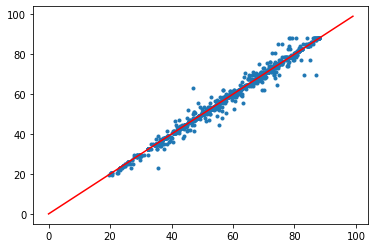

In [21]:
plt.plot(results, Y_validation, '.')
plt.plot(range(100), range(100), color='red')

# Forecasting Future Cases with Prophet

In [22]:
df = pd.read_csv('total_cases.csv').drop(columns = 'Unnamed: 0').dropna().reset_index().drop(columns='index')

In [23]:
df['location'].value_counts()

China                   697
Taiwan                  697
World                   697
Japan                   697
Upper middle income     697
                       ... 
Micronesia (country)    332
Kiribati                215
Cook Islands            212
Palau                   119
Tonga                    51
Name: location, Length: 228, dtype: int64

Using fbprophet for timeseries forcaasting

In [37]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
print('Setup complete')

Setup complete


Using USA as an example

In [39]:
usa = df[df['location'] =='United States'][['date', 'total_cases']]
usa.columns = ['ds', 'y']

In [40]:
m = Prophet()
m.fit(usa)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
F:\Installs\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
F:\Installs\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
F:\Installs\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


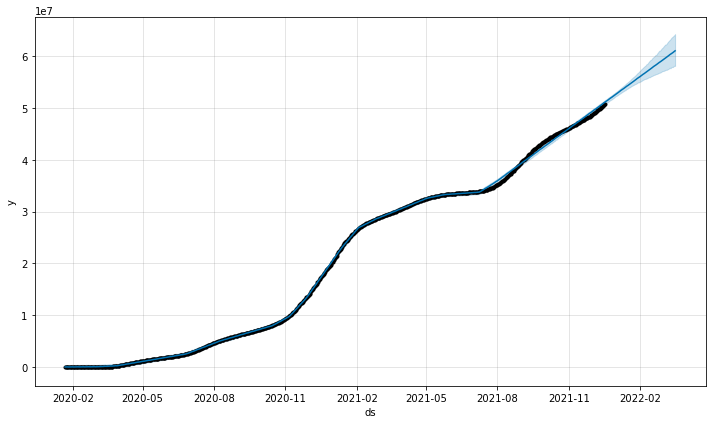

In [28]:
fig1 = m.plot(forecast)

Creating a function so that we can use for every country we would like.

In [30]:
def predict_cases_per_country(country):
    country_df = df[df['location'] == country][['date', 'total_cases']]
    country_df.columns = ['ds', 'y']
    m = Prophet()
    m.fit(country_df)
    future = m.make_future_dataframe(periods=90)
    forecast = m.predict(future)
    fig1 = m.plot(forecast)
    fig1.show()
    

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
F:\Installs\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
F:\Installs\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
F:\Installs\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Lora\AppData\Local\Temp\ipykernel_3808\266548307.py:9: UserWarn

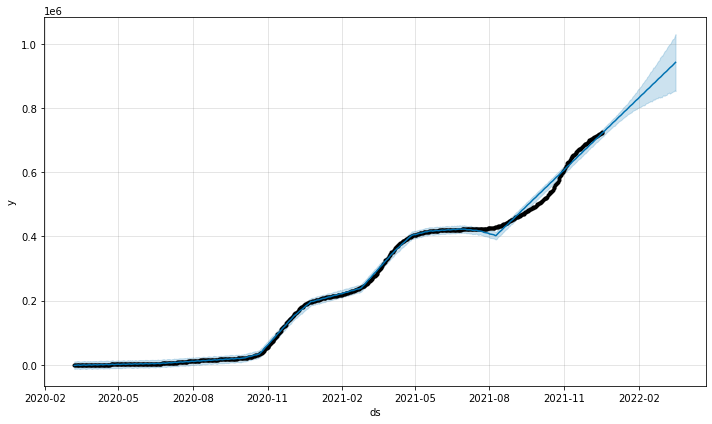

In [31]:
predict_cases_per_country('Bulgaria')